In [2]:
from keras.datasets import boston_housing

In [138]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [61]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [62]:
mean = train_data.mean(axis=0)

In [63]:
train_data -= mean

In [64]:
std = train_data.std(axis=0)

In [65]:
train_data /= std

In [66]:
test_data -= mean

In [67]:
test_data /= std

In [68]:
from keras import models
from keras import layers

In [69]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [70]:
import numpy as np

In [71]:
train_data

array([[ 0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [ 0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [-0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [ 0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [ 0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [ 0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [72]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [157]:
for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    copy_val_data = np.concatenate(
        [val_data[:i*num_val_samples],
        val_data[(i+1)*num_val_samples:]],
        axis=0
    )
    
    copy_val_targets = np.concatenate(
        [val_targets[:i*num_val_samples],
        val_targets[(i+1)*num_val_samples:]],
        axis=0
    )
    
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]],
        axis=0
    )
    
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0
    )

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [82]:
partial_train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [75]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [156]:
val_targets

array([36.2, 14.9, 18.2, 33.3, 21.8, 19.7, 31.6, 24.8, 19.4, 22.8,  7.5,
       44.8, 16.8, 18.7, 50. , 50. , 19.5, 20.1, 50. , 17.2, 20.8, 19.3,
       41.3, 20.4, 20.5, 13.8, 16.5, 23.9, 20.6, 31.5, 23.3, 16.8, 14. ,
       33.8, 36.1, 12.8, 18.3, 18.7, 19.1, 29. , 30.1, 50. , 50. , 22. ,
       11.9, 37.6, 50. , 22.7, 20.8, 23.5, 27.9, 50. , 19.3, 23.9, 22.6,
       15.2, 21.7, 19.2, 43.8, 20.3, 33.2, 19.9, 22.5, 32.7, 22. , 17.1,
       19. , 15. , 16.1, 25.1, 23.7, 28.7, 37.2, 22.6, 16.4, 25. , 29.8,
       22.1, 17.4, 18.1, 30.3, 17.5, 24.7, 12.6, 26.5, 28.7, 13.3, 10.4,
       24.4, 23. , 20. , 17.8,  7. , 11.8, 24.4, 13.8, 19.4, 25.2, 19.4,
       19.4, 29.1])

In [162]:
model = build_model()
model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)

val_mse, val_mae = model.evaluate(copy_val_data, copy_val_targets, verbose=0)

all_scores.append(val_mae)

NameError: name 'history' is not defined

In [160]:
all_scores

[2.320373296737671, 2.680678606033325, 3.2155470848083496, 4.707273960113525]

In [155]:
val_mae

2.680678606033325

In [146]:
for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    if(i>=1):
        partial_train_data = np.concatenate(
            [[train_data[:i*num_val_samples]],
            [train_data[i*num_val_samples:(i+1)*num_val_samples]]],
            axis=1
        )

        partial_train_targets = np.concatenate(
            [[train_targets[:i*num_val_samples]],
            [train_targets[i*num_val_samples:(i+1)*num_val_samples]]],
            axis=1
        )

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [147]:
partial_train_data = partial_train_data[0]
partial_train_targets = partial_train_targets[0]

In [152]:
partial_train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [143]:
np.concatenate([[[1]],[[2]]],axis=0)

array([[1],
       [2]])

In [177]:
all_mae_histories = []

model = build_model()
history = model.fit(partial_train_data, partial_train_targets, 
                    validation_data=(copy_val_data, copy_val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)

mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [176]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


In [178]:
all_mae_histories

[[9.46207332611084,
  7.679730415344238,
  7.0221123695373535,
  5.904910087585449,
  5.481817722320557,
  5.953097343444824,
  7.724501132965088,
  5.2373857498168945,
  5.907047271728516,
  6.25581169128418,
  5.456486225128174,
  5.413740634918213,
  5.919273853302002,
  5.5045952796936035,
  4.927114486694336,
  4.836395740509033,
  7.107256889343262,
  4.7458672523498535,
  4.861978530883789,
  5.323986053466797,
  5.026119232177734,
  6.476650714874268,
  4.832686424255371,
  4.938759803771973,
  7.179750442504883,
  5.45097017288208,
  4.698019981384277,
  4.999101161956787,
  5.0103583335876465,
  5.446223735809326,
  4.7504563331604,
  4.810500144958496,
  4.604416847229004,
  4.717638969421387,
  4.689671516418457,
  5.0334367752075195,
  4.959914207458496,
  4.343816757202148,
  5.426907062530518,
  5.091853141784668,
  4.605250358581543,
  4.5440144538879395,
  4.453708648681641,
  5.600183963775635,
  4.438136100769043,
  4.087496280670166,
  4.4225754737854,
  4.811094284

In [179]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [180]:
average_mae_history

[9.46207332611084,
 7.679730415344238,
 7.0221123695373535,
 5.904910087585449,
 5.481817722320557,
 5.953097343444824,
 7.724501132965088,
 5.2373857498168945,
 5.907047271728516,
 6.25581169128418,
 5.456486225128174,
 5.413740634918213,
 5.919273853302002,
 5.5045952796936035,
 4.927114486694336,
 4.836395740509033,
 7.107256889343262,
 4.7458672523498535,
 4.861978530883789,
 5.323986053466797,
 5.026119232177734,
 6.476650714874268,
 4.832686424255371,
 4.938759803771973,
 7.179750442504883,
 5.45097017288208,
 4.698019981384277,
 4.999101161956787,
 5.0103583335876465,
 5.446223735809326,
 4.7504563331604,
 4.810500144958496,
 4.604416847229004,
 4.717638969421387,
 4.689671516418457,
 5.0334367752075195,
 4.959914207458496,
 4.343816757202148,
 5.426907062530518,
 5.091853141784668,
 4.605250358581543,
 4.5440144538879395,
 4.453708648681641,
 5.600183963775635,
 4.438136100769043,
 4.087496280670166,
 4.4225754737854,
 4.811094284057617,
 3.7974624633789062,
 3.6036906242370605

In [172]:
import matplotlib.pyplot as plt

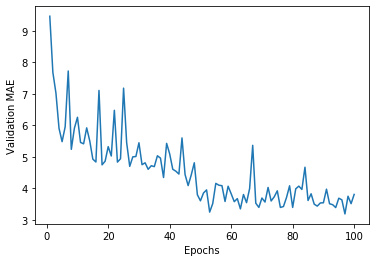

In [181]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()